In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
pd.set_option('max_rows',15) # this limit maximum numbers of rows
np.set_printoptions(precision=3 , suppress= True) # this is just to make the output look better

In [2]:
temp = np.loadtxt('../python_dt/data/Ham_3column.txt')

In [4]:
year2000 = temp[temp[:,0]==2000]
monmean = []
for mon in range(1,13):
    mm = year2000[year2000[:,1]==mon][:,3]/10
    mm = mm.mean()
    monmean.append(mm)
monmean

[5.2548387096774185,
 7.586206896551725,
 8.141935483870967,
 15.06,
 20.53548387096774,
 20.766666666666666,
 19.580645161290324,
 21.735483870967737,
 17.8,
 14.848387096774195,
 9.683333333333334,
 5.838709677419354]

In [7]:
tmax = pd.read_csv('../python_dt/data/DelhiTmax.txt', delimiter=r"\s+", parse_dates=[[0,1,2]], header=None)
tmax.columns = ['Date', 'Temp']
tmax = tmax.set_index(['Date'])

<AxesSubplot:xlabel='Date'>

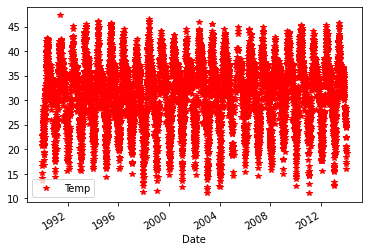

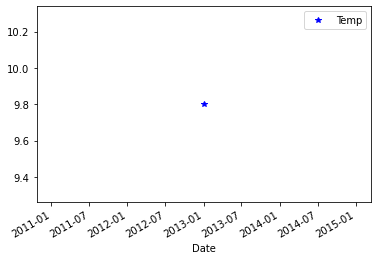

In [12]:
tmax[tmax > 10].loc['1990':'2013'].plot(style='r*')
tmax[tmax < 10].loc['1990':'2013'].plot(style='b*')

In [14]:
tmin = pd.read_csv('../python_dt/data/DelhiTmin.txt',delimiter=r"\s+", parse_dates=[[0,1,2]], header=None)
tmin.columns = ['Date', 'Temp']
tmin = tmin.set_index(['Date'])

In [15]:
dd = pd.date_range('1944-01','2015-03',freq='D')
tmp = pd.DataFrame(index=dd)
tmp['TMIN'] = tmin
tmp['TMAX'] = tmax

In [16]:
tmp['Diff'] = tmp['TMAX'] - tmp['TMIN']
tmp.head()

,TMIN,TMAX,Diff
1944-01-01,NaN,22.2,NaN
1944-01-02,5.0,NaN,NaN
1944-01-03,3.9,23.9,20.0
1944-01-04,5.0,22.2,17.2
1944-01-05,6.1,NaN,NaN


<AxesSubplot:>

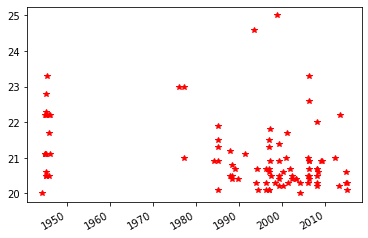

In [17]:
tmp.Diff[tmp.Diff > 20 ].plot(style='r*')

In [22]:
tmp.TMAX[tmp.TMAX>20].mean()

32.23970406056435

In [23]:
tmp.TMIN[tmp.TMIN>20].mean()

25.633803841676368

In [24]:
def minmax(x):
    mmin = x.min()
    mmax = x.max()
    diff = mmax-mmin
    return diff

In [96]:
corona = pd.read_csv('../python_dt/data/corona.csv')
corona['date'] = pd.to_datetime(corona['date'])
corona = corona.set_index('date')

In [97]:
germany = corona[corona['iso_code']=='DEU']

Text(0, 0.5, 'cases')

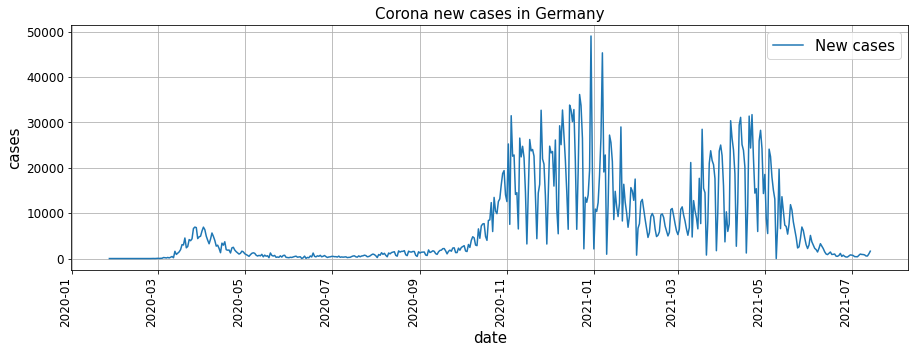

In [98]:
germany['new_cases'].plot(figsize=(15,5), grid=True,
                          rot=90, fontsize=12)
plt.title('Corona new cases in Germany', size=15)
plt.legend(['New cases'], fontsize=15)
plt.xlabel('date', fontsize=15)
plt.ylabel('cases', fontsize=15)

In [99]:
case_death = germany[['new_cases','new_deaths']].loc['2020-04':'2021-07'].rolling('7D').mean()

In [100]:
a = []
for i in range(50):
    corr = case_death['new_cases'].corr(case_death['new_deaths'].shift(-i))
    a.append(corr)

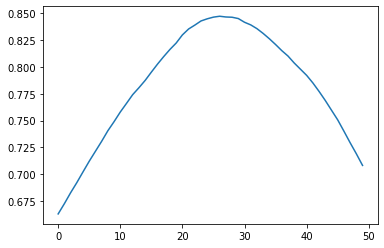

In [101]:
plt.plot(a)

In [102]:
np.argmax(a)

26

In [109]:
india = corona[corona['iso_code']=='ITA']

<AxesSubplot:xlabel='date'>

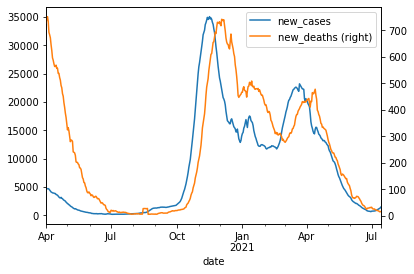

In [110]:
case_death = india[['new_cases','new_deaths']].loc['2020-04':'2021-07'].rolling('7D').mean()
case_death.plot(secondary_y='new_deaths')

19

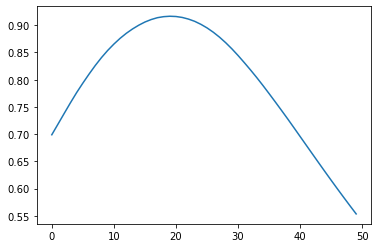

In [111]:
a = []
for i in range(50):
    corr = case_death['new_cases'].corr(case_death['new_deaths'].shift(-i))
    a.append(corr)
plt.plot(a)
np.argmax(a)

<AxesSubplot:xlabel='date'>

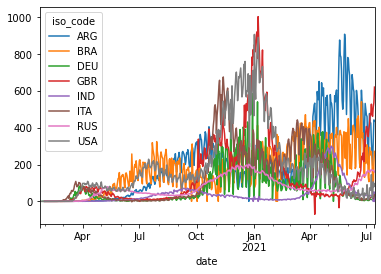

In [112]:
count_total_cases = corona.pivot_table(index=['date'], 
            columns=['iso_code'], values='new_cases_per_million')
count_total_cases.plot()

<AxesSubplot:xlabel='date'>

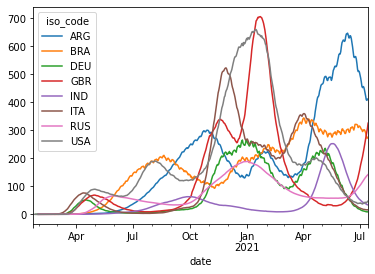

In [128]:
count_total_cases.rolling('30D').mean().plot()

In [133]:
count_total_cases.rolling('30D').mean().corr()

iso_code,ARG,BRA,DEU,GBR,IND,ITA,RUS,USA
iso_code,,,,,,,,
ARG,1.000000,0.717312,0.320780,0.095059,0.811745,0.172177,0.217149,0.003965
BRA,0.717312,1.000000,0.434237,0.166901,0.540101,0.329388,0.365203,0.250205
DEU,0.320780,0.434237,1.000000,0.651613,0.313391,0.882679,0.737471,0.800093
GBR,0.095059,0.166901,0.651613,1.000000,-0.172492,0.575655,0.859930,0.865891
IND,0.811745,0.540101,0.313391,-0.172492,1.000000,0.093703,-0.013285,-0.088434
ITA,0.172177,0.329388,0.882679,0.575655,0.093703,1.000000,0.686309,0.700131
RUS,0.217149,0.365203,0.737471,0.859930,-0.013285,0.686309,1.000000,0.879078
USA,0.003965,0.250205,0.800093,0.865891,-0.088434,0.700131,0.879078,1.000000


<AxesSubplot:xlabel='date'>

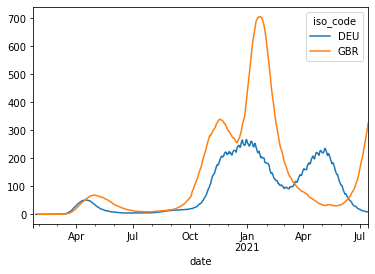

In [130]:
# correlation makes not much sence in this case
count_total_cases.rolling('30D')[['DEU', 'GBR']].mean().plot()

<AxesSubplot:xlabel='date'>

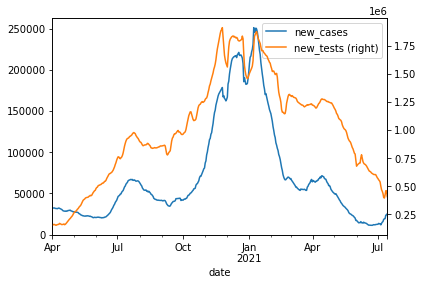

In [148]:
india = corona[corona['iso_code']=='USA']
a = india[['new_cases', 'new_tests']].loc['2020-04':'2021-07'].rolling('7D').mean()
a.plot(secondary_y='new_tests')

<AxesSubplot:xlabel='new_cases', ylabel='new_tests'>

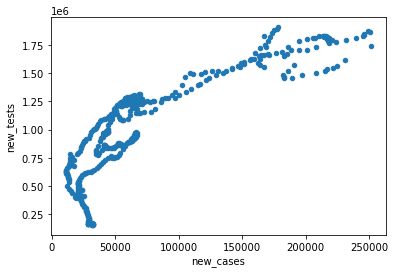

In [149]:
a.plot(kind='scatter', x='new_cases', y='new_tests')